Table of Content 
Global Variables
1. Data Preprocessing

  1.1 Importing Data and Separating Data of Our Interest

  1.2 Creating Preprocessing Function and Applying it on Our Data

  1.3 Creating TF-IDF Matrix

2. Apply SVD to TF-IDF Matrix

  2.1 Create Term and Document Representation

  2.2 Visulize Those Representation

3 Information Retreival Using LSA

4 References

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Data Preprocessing 

1.1 Importing Data and Separating Data of Our Interest 


In [1]:
import pandas as pd
import numpy as np

# Data filename
dataset_filename = "/content/drive/My Drive/edited_topics_set2.csv"

# Loading dataset
data = pd.read_csv(dataset_filename, index_col=0)

# We are reducing the size of our dataset to decrease the running time of code
datax = data.head(100)


# # Delete missing observations for variables that we will be working with
# for x in ["Recommended IND","Review Text"]:
#     datax = datax[datax[x].notnull()]

# # Keeping only those features that we will explore
# datax = datax[["Recommended IND","Review Text"]]

# Resetting the index
datax.index = pd.Series(list(range(datax.shape[0])))
    
print('Shape : ',datax.shape)
datax.head()

Shape :  (100, 6)


,Unnamed: 0.1,_id,topic,content,processed_content,processed_topic
0,0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",west bengal govern tuesday decid impos complet...,nation
1,1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",govern weigh pros con halt import includ china...,busi
2,2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",central board secondari educ cbse slash syllab...,nation
3,3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",world health organ tuesday acknowledg emerg ev...,intern
4,4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",presid donald trump tuesday formal start withd...,intern


In [2]:
datax.shape

(100, 6)

In [3]:
#Creating Preprocessing Function and Applying it on Our Data 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

In [4]:
datax['Processed Review'] = datax['content'].apply(preprocess)

datax.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0.1,_id,topic,content,processed_content,processed_topic,Processed Review
0,0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",west bengal govern tuesday decid impos complet...,nation,west bengal government tuesday decide impose c...
1,1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",govern weigh pros con halt import includ china...,busi,government weigh pro con halt import include c...
2,2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",central board secondari educ cbse slash syllab...,nation,central board secondary education cbse slash s...
3,3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",world health organ tuesday acknowledg emerg ev...,intern,world health organization tuesday acknowledge ...
4,4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",presid donald trump tuesday formal start withd...,intern,president donald trump tuesday formally start ...


In [5]:
#Creating TF-IDF Matrix 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
TF_IDF_matrix = vectorizer.fit_transform(datax['Processed Review'])
TF_IDF_matrix = TF_IDF_matrix.T

print('Vocabulary Size : ', len(vectorizer.get_feature_names()))
print('Shape of Matrix : ', TF_IDF_matrix.shape)

Vocabulary Size :  5191
Shape of Matrix :  (5191, 100)


Apply SVD to TF-IDF Matrix 

2.1 Create Term and Document Representation 

In [6]:
import numpy as np
K = 100

# Applying SVD
U, s, VT = np.linalg.svd(TF_IDF_matrix.toarray()) # .T is used to take transpose and .toarray() is used to convert sparse matrix to normal matrix

TF_IDF_matrix_reduced = np.dot(U[:,:K], np.dot(np.diag(s[:K]), VT[:K, :]))

# Getting document and term representation
terms_rep = np.dot(U[:,:K], np.diag(s[:K])) # M X K matrix where M = Vocabulary Size and N = Number of documents
docs_rep = np.dot(np.diag(s[:K]), VT[:K, :]).T # N x K matrix 

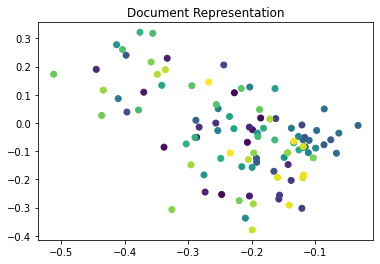

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(docs_rep[:,0], docs_rep[:,1], c=datax['Unnamed: 0.1'])
plt.title("Document Representation")
plt.show()

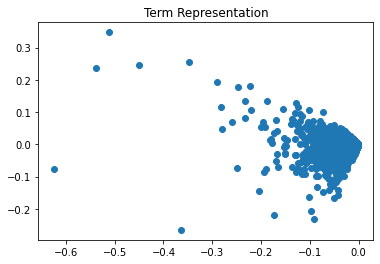

In [8]:
plt.scatter(terms_rep[:,0], terms_rep[:,1])
plt.title("Term Representation")
plt.show()

Information Retreival Using LSA

In [10]:
query = "virus"

In [11]:
# This is a function to generate query_rep

def lsa_query_rep(query):
    query_rep = [vectorizer.vocabulary_[x] for x in preprocess(query).split()]
    query_rep = np.mean(terms_rep[query_rep],axis=0)
    return query_rep
from scipy.spatial.distance import cosine

query_rep = lsa_query_rep(query)

query_doc_cos_dist = [cosine(query_rep, doc_rep) for doc_rep in docs_rep]
query_doc_sort_index = np.argsort(np.array(query_doc_cos_dist))

print_count = 0
for rank, sort_index in enumerate(query_doc_sort_index):
    print ('Rank : ', rank, ' Consine : ', 1 - query_doc_cos_dist[sort_index],' Review : ', datax['content'][sort_index])
    if print_count == 4 :
        break
    else:
        print_count += 1

Rank :  0  Consine :  0.588622940049677  Review :  ["Imagine getting tested for the Covid-19 virus, without having to get your throat swabbed, at just Rs 150-250. All it takes is an x-ray of the chest.","It is possible with Cov-Astra, a low-cost AI-based device developed by AIndra Systems founder Adarsh Natarajan, which can replace the conventional Covid-19 testing that could cost over Rs 4,000.","This is one of the six innovations the state government unveiled on Tuesday that promise to make life better during the Covid-19 pandemic. These products have been developed by startups incubated and mentored at the Bengaluru Bioinnovation Centre (BBC), an initiative of the state government.","Follow latest updates on the Covid-19 pandemic here","Another innovation is the Shieldex 24, a microwave-like device developed by bioinformatics startup Biofi’s Ravikumar Rajendraprasad that can eliminate viruses located on objects such as a wallet, mobile phone, pen and so on within 15 seconds with ult